In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hindi-poetry-dataset/sample_dhoopbahuthai_1.txt
/kaggle/input/hindi-poetry-dataset/sample_dhoopbahuthai_19.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_8.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_83.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_73.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_38.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_10.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_79.txt
/kaggle/input/hindi-poetry-dataset/sample_dhoopbahuthai_36.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_36.txt
/kaggle/input/hindi-poetry-dataset/sample_dhoopbahuthai_37.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_53.txt
/kaggle/input/hindi-poetry-dataset/sample_dhoopbahuthai_82.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_51.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_19.txt
/kaggle/input/hindi-poetry-dataset/sample_dhoopbahuthai_53.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_39.txt
/k

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()
path = '/kaggle/input/hindi-poetry-dataset/'
files = os.listdir(path)
#for i in files:
data = open(path+files[0]).read()
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [4]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           222200    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1111)              112211    
_________________________________________________________________
dense_1 (Dense)              (None, 2222)              2470864   
Total params: 3,266,875
Trainable params: 3,266,875
Non-trainable params: 0
______________________________________________

In [5]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
242/242 [==============================] - 3s 12ms/step - loss: 6.9062 - accuracy: 0.0630
Epoch 2/100
242/242 [==============================] - 3s 11ms/step - loss: 6.2062 - accuracy: 0.0634
Epoch 3/100
242/242 [==============================] - 2s 10ms/step - loss: 6.0611 - accuracy: 0.0580
Epoch 4/100
242/242 [==============================] - 3s 11ms/step - loss: 5.9502 - accuracy: 0.0598
Epoch 5/100
242/242 [==============================] - 3s 12ms/step - loss: 5.8027 - accuracy: 0.0707
Epoch 6/100
242/242 [==============================] - 2s 10ms/step - loss: 5.6297 - accuracy: 0.0811
Epoch 7/100
242/242 [==============================] - 2s 10ms/step - loss: 5.4845 - accuracy: 0.0839
Epoch 8/100
242/242 [==============================] - 2s 10ms/step - loss: 5.3562 - accuracy: 0.0907
Epoch 9/100
242/242 [==============================] - 2s 10ms/step - loss: 5.2482 - accuracy: 0.0956
Epoch 10/100
242/242 [==============================] - 3s 11ms/step - loss: 5.139

242/242 [==============================] - 3s 10ms/step - loss: 1.1028 - accuracy: 0.8222
Epoch 81/100
242/242 [==============================] - 3s 11ms/step - loss: 1.0788 - accuracy: 0.8228
Epoch 82/100
242/242 [==============================] - 2s 10ms/step - loss: 1.0649 - accuracy: 0.8277
Epoch 83/100
242/242 [==============================] - 2s 10ms/step - loss: 1.0405 - accuracy: 0.8321
Epoch 84/100
242/242 [==============================] - 2s 10ms/step - loss: 1.0245 - accuracy: 0.8387
Epoch 85/100
242/242 [==============================] - 3s 12ms/step - loss: 1.0025 - accuracy: 0.8419
Epoch 86/100
242/242 [==============================] - 3s 11ms/step - loss: 0.9923 - accuracy: 0.8420
Epoch 87/100
242/242 [==============================] - 2s 10ms/step - loss: 0.9752 - accuracy: 0.8453
Epoch 88/100
242/242 [==============================] - 2s 10ms/step - loss: 0.9670 - accuracy: 0.8479
Epoch 89/100
242/242 [==============================] - 2s 10ms/step - loss: 0.9565 - 

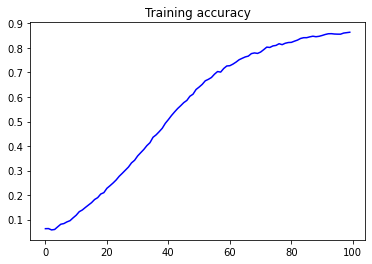

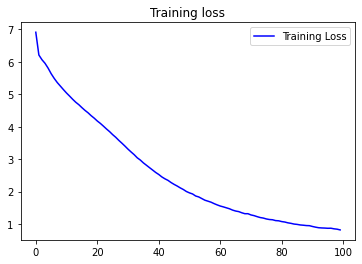

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [10]:
seed_text = "ज़िंदा रहन, सारे मौसमा,ली है आँखों ने"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

'ज़िंदा रहन, सारे मौसमा,ली है आँखों ने' पर मौजूद था कोई और चांद क्यों टूट काफ़ी है क्या पूछेंगे पर है नहीं नहीं हैं क्या नहीं है नहीं वाली है बस घट गई हूँ वहाँ पर कुछ है जितनी अज़्मत हो गये कितनी लें हो जा है है कि शायद किस का है जाना जाना ख़बर हो
